In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df=pd.read_csv('D:\Datasets\car_evaluation.csv')

In [124]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [125]:
df.shape

(1727, 7)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [127]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']

In [128]:
df.columns=col_names

In [129]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [130]:
#check if null values are present

In [131]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [132]:
#check if data is balanced-for all the columns at one go

In [133]:
for i in col_names:
    print(df[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [134]:
#create a countplot for some of the parameters

<AxesSubplot:xlabel='buying', ylabel='count'>

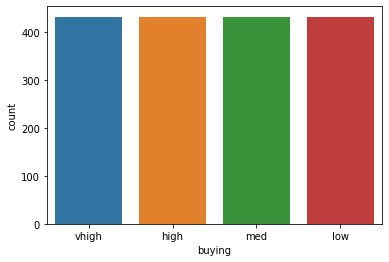

In [135]:
sns.countplot(data=df,x='buying')

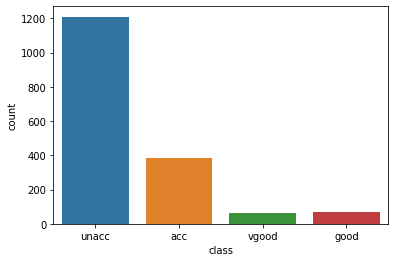

In [136]:
sns.countplot(data=df,x='class')
plt.show()

In [137]:
#create the feature vector and the target variable

In [138]:
x=df.drop(['class'],axis=1)
y=df['class']
x.shape

(1727, 6)

In [139]:
y.shape

(1727,)

In [140]:
#split the data into training and testing

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [142]:
x_train.shape

(1208, 6)

In [143]:
y_train.shape

(1208,)

In [144]:
x_test.shape

(519, 6)

In [145]:
#Feature engineering
#convert categorical cols to numerical

In [146]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [147]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['buying','maint','lug_boot','safety'])

In [148]:
x_train=encoder.fit_transform(x_train)
x_test=encoder.fit_transform(x_test)

C:\Users\HP\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [149]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,1,1,5more,4,1,1
585,2,2,3,more,2,2
1551,3,1,3,4,3,2
727,2,1,4,more,1,1
707,2,1,4,2,1,3


In [150]:
#convert doors and persons to numeric

In [151]:
df['persons'].value_counts()

4       576
more    576
2       575
Name: persons, dtype: int64

In [152]:
df['doors'].value_counts()

3        432
4        432
5more    432
2        431
Name: doors, dtype: int64

In [153]:
x_train['persons']=x_train['persons'].map({'4':4,'more':5,'2':2})

In [154]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 1177 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1208 non-null   int32 
 1   maint     1208 non-null   int32 
 2   doors     1208 non-null   object
 3   persons   1208 non-null   int64 
 4   lug_boot  1208 non-null   int32 
 5   safety    1208 non-null   int32 
dtypes: int32(4), int64(1), object(1)
memory usage: 47.2+ KB


In [155]:
x_train['doors']=x_train['doors'].map({'4':4,'5more':5,'2':2,'3':3})

In [156]:
x_test['persons']=x_test['persons'].map({'4':4,'more':5,'2':2})

In [157]:
x_test['doors']=x_test['doors'].map({'4':4,'5more':5,'2':2,'3':3})

In [158]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 1177 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1208 non-null   int32
 1   maint     1208 non-null   int32
 2   doors     1208 non-null   int64
 3   persons   1208 non-null   int64
 4   lug_boot  1208 non-null   int32
 5   safety    1208 non-null   int32
dtypes: int32(4), int64(2)
memory usage: 47.2 KB


In [159]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,1,1,5,4,1,1
585,2,2,3,5,2,2
1551,3,1,3,4,3,2
727,2,1,4,5,1,1
707,2,1,4,2,1,3


In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [162]:
y_pred_gini=gini.predict(x_test)

In [163]:
#check the accuracy
from sklearn.metrics import accuracy_score
print('Testing Accuracy with gini index is',accuracy_score(y_test,y_pred_gini))

Testing Accuracy with gini index is 0.815028901734104


In [164]:
#CART uses gini ID3 C4.5 use entropy

In [165]:
#training accuracy

In [166]:
y_pred_train_gini=gini.predict(x_train)
print('Training accuracy with gini index is',accuracy_score(y_train,y_pred_train_gini))

Training accuracy with gini index is 0.8013245033112583


In [167]:
#model is a good fit because the training and testing accuracies are almost same

[Text(0.6, 0.875, 'X[5] <= 2.5\ngini = 0.456\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.4, 0.625, 'X[3] <= 3.0\ngini = 0.581\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.6, 0.375, 'X[0] <= 3.5\ngini = 0.632\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.4, 0.125, 'gini = 0.634\nsamples = 406\nvalue = [216, 52, 96, 42]'),
 Text(0.8, 0.125, 'gini = 0.458\nsamples = 141\nvalue = [50, 0, 91, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

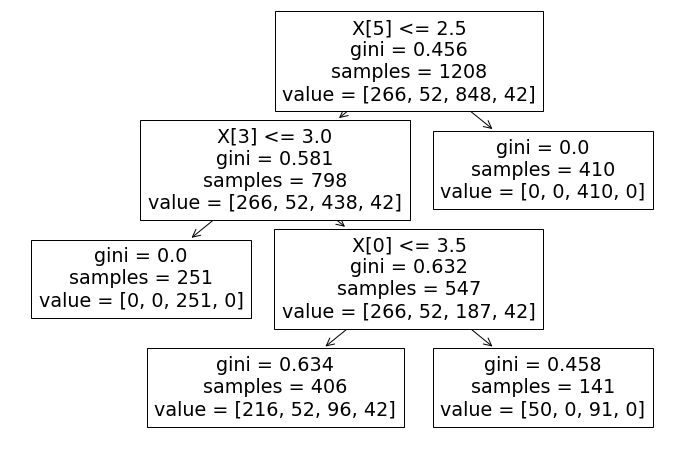

In [168]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(gini.fit(x_train,y_train))

In [169]:
entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [170]:
y_pred_en=entropy.predict(x_test)

In [171]:
#check the accuracy
from sklearn.metrics import accuracy_score
print('Testing Accuracy with entropy is',accuracy_score(y_test,y_pred_en))

Testing Accuracy with entropy is 0.815028901734104


In [172]:
y_pred_train_en=entropy.predict(x_train)
print('Training accuracy with gini index is',accuracy_score(y_train,y_pred_train_en))

Training accuracy with gini index is 0.8013245033112583


[Text(0.6, 0.875, 'X[5] <= 2.5\nentropy = 1.203\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.4, 0.625, 'X[3] <= 3.0\nentropy = 1.484\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.6, 0.375, 'X[0] <= 3.5\nentropy = 1.642\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.4, 0.125, 'entropy = 1.695\nsamples = 406\nvalue = [216, 52, 96, 42]'),
 Text(0.8, 0.125, 'entropy = 0.938\nsamples = 141\nvalue = [50, 0, 91, 0]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

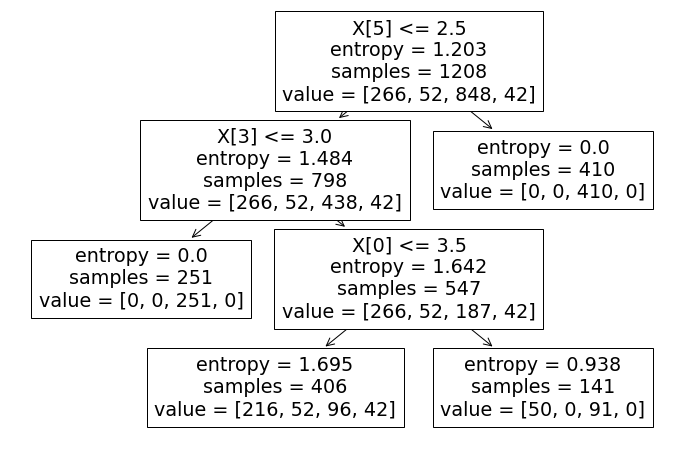

In [173]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(entropy.fit(x_train,y_train))

In [201]:
trainingacc=[]
testingacc=[]

In [202]:
gini=DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0)
gini.fit(x_train,y_train)
y_pred_gini=gini.predict(x_test)
#check the accuracy
from sklearn.metrics import accuracy_score
testingacc.append(accuracy_score(y_test,y_pred_gini))
print('Testing Accuracy with gini index depth 2 is',accuracy_score(y_test,y_pred_gini))
y_pred_train_gini=gini.predict(x_train)
print('Training accuracy with gini index is',accuracy_score(y_train,y_pred_train_gini))
trainingacc.append(accuracy_score(y_train,y_pred_train_gini))

Testing Accuracy with gini index depth 2 is 0.8015414258188824
Training accuracy with gini index is 0.7673841059602649


In [203]:
gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
gini.fit(x_train,y_train)
y_pred_gini=gini.predict(x_test)
#check the accuracy
from sklearn.metrics import accuracy_score
testingacc.append(accuracy_score(y_test,y_pred_gini))
print('Testing Accuracy with gini index depth 3 is',accuracy_score(y_test,y_pred_gini))
y_pred_train_gini=gini.predict(x_train)
print('Training accuracy with gini index is',accuracy_score(y_train,y_pred_train_gini))
trainingacc.append(accuracy_score(y_train,y_pred_train_gini))

Testing Accuracy with gini index depth 3 is 0.815028901734104
Training accuracy with gini index is 0.8013245033112583


In [204]:
gini=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
gini.fit(x_train,y_train)
y_pred_gini=gini.predict(x_test)
#check the accuracy
from sklearn.metrics import accuracy_score
testingacc.append(accuracy_score(y_test,y_pred_gini))
print('Testing Accuracy with gini index depth 4 is',accuracy_score(y_test,y_pred_gini))
y_pred_train_gini=gini.predict(x_train)
print('Training accuracy with gini index is',accuracy_score(y_train,y_pred_train_gini))
trainingacc.append(accuracy_score(y_train,y_pred_train_gini))

Testing Accuracy with gini index depth 4 is 0.8285163776493256
Training accuracy with gini index is 0.8153973509933775


In [205]:
gini=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)
gini.fit(x_train,y_train)
y_pred_gini=gini.predict(x_test)
#check the accuracy
from sklearn.metrics import accuracy_score
testingacc.append(accuracy_score(y_test,y_pred_gini))
print('Testing Accuracy with gini index depth 5 is',accuracy_score(y_test,y_pred_gini))
y_pred_train_gini=gini.predict(x_train)
print('Training accuracy with gini index is',accuracy_score(y_train,y_pred_train_gini))
trainingacc.append(accuracy_score(y_train,y_pred_train_gini))

Testing Accuracy with gini index depth 5 is 0.8227360308285164
Training accuracy with gini index is 0.831953642384106


In [206]:
x=[2,3,4,5]

In [208]:
print(testingacc)

[0.8015414258188824, 0.815028901734104, 0.8285163776493256, 0.8227360308285164]


In [209]:
print(trainingacc)

[0.7673841059602649, 0.8013245033112583, 0.8153973509933775, 0.831953642384106]


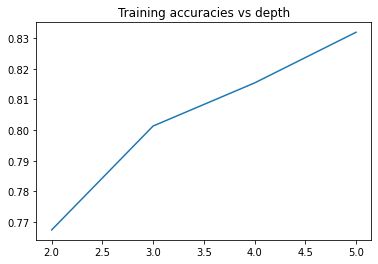

In [210]:
plt.plot(x,trainingacc)
plt.title('Training accuracies vs depth')
plt.show()

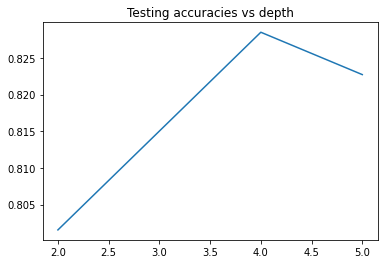

In [211]:
plt.plot(x,testingacc)
plt.title('Testing accuracies vs depth')
plt.show()

In [ ]:
#max_depth of 4 can be fixed